###### %%writefile test
## Practice
1. Input images from red_blood_cell.jpg.
2. Use morphological filters to remove noise.
3. Use <i>cv2.HoughCircles()</i> to detect circles.
4. Count automatically how many cells in the image.
5. Optional:Show each individual circle using different color.
6. Use <i>cv2.putText()</i> to write the number of cells on the upper left corner.
7. Show the output image.

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

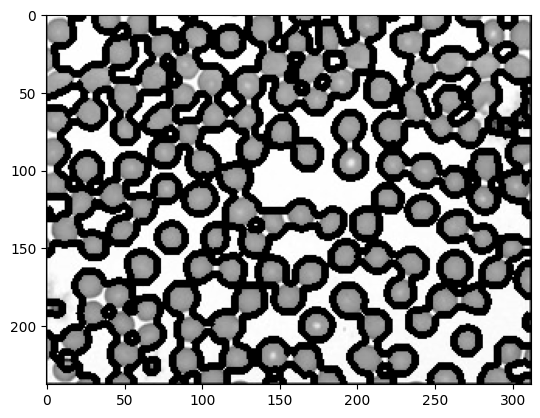

In [25]:
img = cv2.imread('red_blood_cell.jpg', cv2.IMREAD_GRAYSCALE)

# Use morphological filters to remove noise.
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Use Canny edge detection to find edges.
edges = cv2.Canny(closing, 100, 200)

# Find contours.

contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Draw contours.
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

plt.imshow(img, cmap='gray')
plt.show()


Number of cells:  105


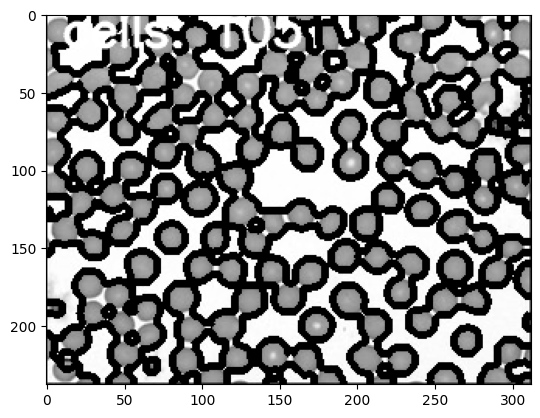

In [27]:
# Count automatically how many cells in the image.

print('Number of cells: ', len(contours))

# Use cv2.putText() to write the number of cells on the upper left corner.
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'cells: ' + str(len(contours)), (10, 20), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

plt.imshow(img, cmap='gray')
plt.show()